# Importing The DataSets

In [48]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset=pd.read_csv('train_E6oV3lV (1).csv')
dataset2=pd.read_csv('test_tweets_anuFYb8.csv')
X_test = dataset2.values

In [3]:
dataset

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
dataset = dataset.drop(['id'],axis = 1)

In [5]:
dataset

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [6]:
y = dataset.iloc[:,:-1].values #independent variable

# Checking For Missing Values

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


# Analysing the Data

In [8]:
print(dataset.head())

   label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation


In [9]:
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [10]:
ham = dataset[dataset['label'] == 0] 
spam = dataset[dataset['label'] == 1 ]
length = [len(ham),len(spam)]
print(length)

[29720, 2242]


# Visualizing The Data

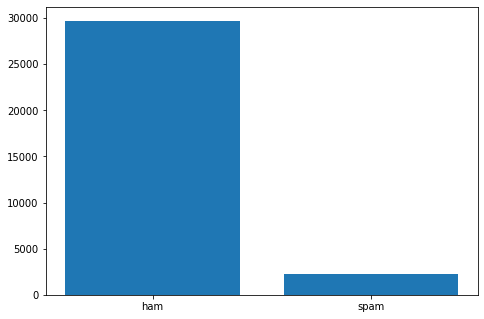

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['ham','spam']
ax.bar(label,length)
plt.show()

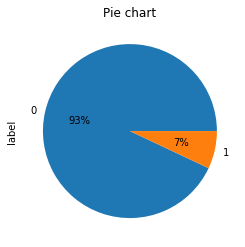

In [12]:
count_Class=pd.value_counts(dataset["label"], sort= True)
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('label')
plt.show()

In [13]:
from collections import Counter
count1 = Counter(" ".join(dataset[dataset['label']== 0]["tweet"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(dataset[dataset['label']== 1]["tweet"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

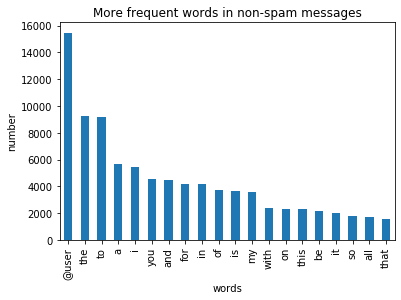

In [14]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

C:\Users\lance\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lance\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


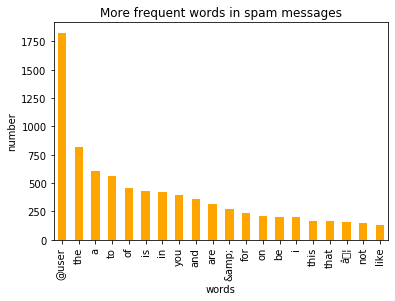

In [15]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

# For Train Set 

#  Cleaning the texts and steming it 

In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 31962 ):
  review = re.sub('[^a-zA-Z]', ' ', dataset['tweet'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lance\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
print(corpus)

['user father dysfunct selfish drag kid dysfunct run', 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank', 'bihday majesti', 'model love u take u time ur', 'factsguid societi motiv', 'huge fan fare big talk leav chao pay disput get allshowandnogo', 'user camp tomorrow user user user user user user user danni', 'next school year year exam think school exam hate imagin actorslif revolutionschool girl', 'love land allin cav champion cleveland clevelandcavali', 'user user welcom gr', 'ireland consum price index mom climb previou may blog silver gold forex', 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love', 'get see daddi today day gettingf', 'user cnn call michigan middl school build wall chant tcot', 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin', 'ouch junior angri got junior yugyoem omg', 'thank paner thank posit', 'retweet agre', 'friday smile around via ig user user 

# Creating the Bag of Words model for train set



In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=all_stopwords, max_features = 1000)
print(vectorizer)
X_train = vectorizer.fit_transform(corpus).toarray()
print(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ..

# Creating a DocumentTermMatrix

In [19]:
df2 = pd.DataFrame(X_train.transpose(),
                   index=vectorizer.get_feature_names())
print(df2)

         0      1      2      3      4      5      6      7      8      9      \
abl        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
absolut    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
accept     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
account    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
act        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
york       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
young      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
youtub     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
yr         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
yummi      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         ...  31952  31953 

# Making a WordCloud from Corpus Data

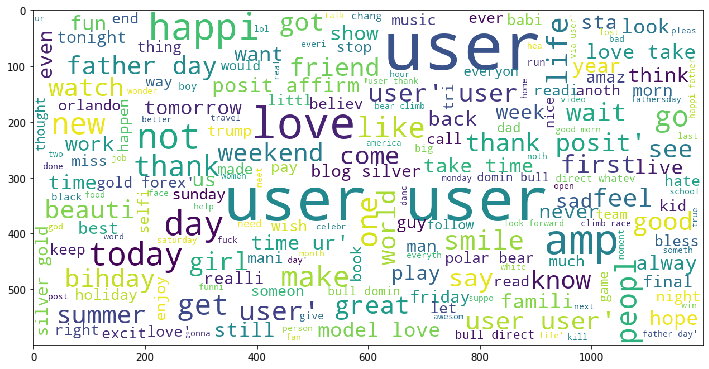

In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = all_stopwords

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=all_stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))

    plt.imshow(wordcloud)

show_wordcloud(corpus)

# Applying KMeans Clustering Algorithm

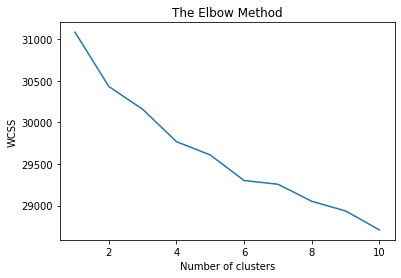

In [51]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  k_means=KMeans(n_clusters = i, init="k-means++", random_state=42)
  k_means.fit(X_train)
  wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
from sklearn.cluster import MiniBatchKMeans

In [21]:
from sklearn.cluster import MiniBatchKMeans
cls = MiniBatchKMeans(n_clusters=5, random_state=0)
cls.fit(X_train)
cls.predict(X_train)
cls.labels_

array([2, 3, 0, ..., 0, 3, 3])

# For Test Set

In [22]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus2 = []
for i in range(0, 17197):
  review2 = re.sub('[^a-zA-Z]', ' ', dataset2['tweet'][i])
  review2 = review2.lower()
  review2 = review2.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review2 = [ps.stem(word) for word in review2 if not word in set(all_stopwords)]
  review2 = ' '.join(review2)
  corpus2.append(review2)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lance\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
print(corpus2)

['studiolif aislif requir passion dedic willpow find newmateri', 'user white supremacist want everyon see new bird movi', 'safe way heal acn altwaystoh healthi heal', 'hp curs child book reserv alreadi ye harrypott pottermor favorit', 'rd bihday amaz hilari nephew eli ahmir uncl dave love miss', 'choos momtip', 'someth insid die eye ness smokeyey tire lone sof grung', 'finish tattoo ink ink loveit thank aleee', 'user user user never understand dad left young deep inthefeel', 'delici food lovelif capetown mannaepicur restur', 'dayswast narcosi infinit ep make awar grind neuro bass lifestyl', 'one world greatest spo event leman teamaudi', 'half way websit allgoingwel', 'good food good life enjoy call garlic bread iloveit', 'stand behind guncontrolpleas senselessshoot takethegun comicrelief stillsad', 'ate ate ate jamaisasthi fish curri prawn hilsa foodfestiv foodi', 'user got user limit edit rain shine set today user user user user', 'amp love amp hug amp kiss keep babi parent healthcar'

# Creating the Bag of Words model for test set


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer(stop_words=all_stopwords, max_features = 1000)
print(vectorizer2)
X_test = vectorizer2.fit_transform(corpus2).toarray()
print(X_test)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ..

# Creating a DocumentTermMatrix

In [25]:
df2 = pd.DataFrame(X_test.transpose(),
                   index=vectorizer2.get_feature_names())
print(df2)

         0      1      2      3      4      5      6      7        8      \
abl        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
absolut    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
abt        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
accept     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
account    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
...        ...    ...    ...    ...    ...    ...    ...    ...      ...   
yoga       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
young      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.42804   
youtub     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
yr         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
yummi      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   

         9      ...  17187  17188  17189  17190  17191  17192  17193  17194  \
abl     

# Making a WordCloud from Corpus Data

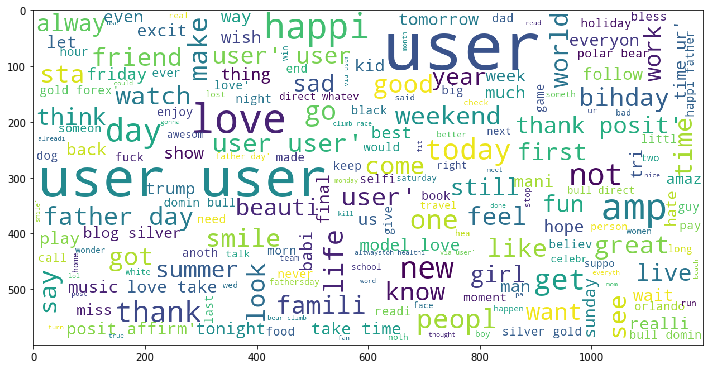

In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = all_stopwords

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=all_stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))

    plt.imshow(wordcloud)

show_wordcloud(corpus2)

# Linear dimensionality reduction

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X_train)
print(reduced_features)
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

[[ 0.11002128 -0.03726924]
 [ 0.21804056  0.2421947 ]
 [-0.07641728 -0.02585043]
 ...
 [-0.09524067 -0.02120477]
 [ 0.20453693  0.00071807]
 [ 0.18853933  0.45308512]]


# Visualizing The Clusters

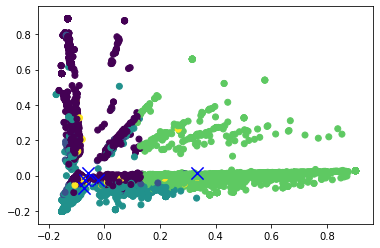

In [28]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(X_train))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# Splitting The Dataset into training and testing

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,y,test_size=0.2, random_state=0)

In [30]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Testing different Models

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\lance\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lance\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred=log_reg.predict(x_test)
print(y_pred)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

[0 0 0 ... 0 0 0]


0.9522915689034882

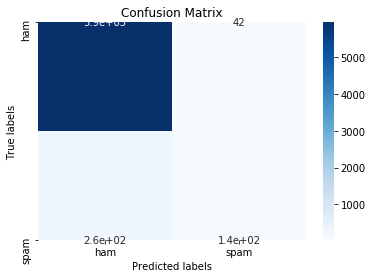

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['ham', 'spam']); ax.yaxis.set_ticklabels(['ham', 'spam']);

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Classifier.fit(x_train,y_train)

C:\Users\lance\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
y_pred = Classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5931   54]
 [ 261  147]]


0.9507273580478649

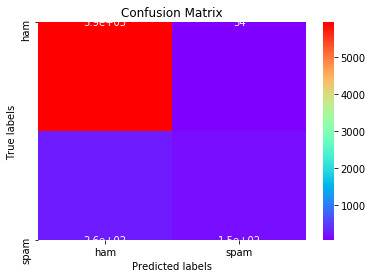

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='rainbow'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['ham', 'spam']); ax.yaxis.set_ticklabels(['ham', 'spam']);

#Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB
clas=GaussianNB()
clas.fit(x_train,y_train)

C:\Users\lance\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
y_pred=clas.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred, y_test)

[[3044   39]
 [2941  369]]


0.5338651650242453

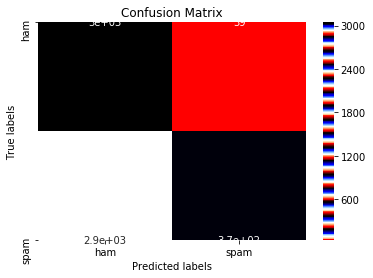

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='flag'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['ham', 'spam']); ax.yaxis.set_ticklabels(['ham', 'spam']);

## Selected Logistic Regression Classifier

# Prediction on Manual Inputs




In [42]:
p = [input("enter a string::")]
p = vectorizer.transform(p).toarray()
print(p)

enter a string::this is LNd
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.

In [43]:
print(p.shape[1], X_train.shape[1])

1000 1000


In [45]:
if log_reg.predict(p) == 0:
  print("Not Spam")
else :
  print(Spam)

Not Spam


# Predicting the Test File

In [46]:
Y_Pred_Test = log_reg.predict(X_test)
Y_Pred_Test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Dumping the model as using joblib

In [47]:
import joblib
filename1 = 'finalized_model4.sav'
filename2 = 'finalized_model5.sav'
joblib.dump(log_reg, filename1)
joblib.dump(vectorizer, filename2)

['finalized_model5.sav']